In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import umap.umap_ as umap
import hdbscan

In [4]:
data = pd.read_csv("/content/amazon_data_cleaned.csv")
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city_x,customer_state_x,customer_unique_id,...,payment_type,payment_installments,payment_value,delivery_delay,actual_delivery_time,order_item_total,total_orders,total_spent,recency_days,frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,franca,SP,7c396fd4830fd04220f754e42b4e5bff,...,credit_card,1.0,18.12,7.0,8.0,38.71,1.0,116.13,331.0,3.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,franca,SP,7c396fd4830fd04220f754e42b4e5bff,...,voucher,1.0,2.00,7.0,8.0,38.71,1.0,116.13,331.0,3.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,franca,SP,7c396fd4830fd04220f754e42b4e5bff,...,voucher,1.0,18.59,7.0,8.0,38.71,1.0,116.13,331.0,3.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,sao bernardo do campo,SP,af07308b275d755c9edb36a90c618231,...,boleto,1.0,141.46,5.0,13.0,141.46,1.0,141.46,35.0,1.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,sao paulo,SP,3a653a41f6f9fc3d2a113cf8398680e8,...,credit_card,3.0,179.12,17.0,9.0,179.12,1.0,179.12,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,e0dbe64f00bd054951b1981f99a58f4b,a668337cdc7f3d920473a4b15c04f57a,delivered,2017-09-28 14:09:00,2017-09-29 21:15:00,2017-10-11 18:40:00,2017-10-30,porto alegre,RS,a8d540710a95ca0c383f330d63f8070a,...,credit_card,3.0,35.00,18.0,13.0,35.00,1.0,35.00,335.0,1.0
18493,58ba43739da75a7d57d464e2adedb4e7,cf5116c8a3a4484640454565f54fefe6,delivered,2018-04-02 15:32:00,2018-04-03 23:41:00,2018-04-11 17:02:00,2018-04-20,natal,RN,9c716774f1360606a27c1d0a2fd5a79c,...,credit_card,2.0,141.82,8.0,9.0,141.82,1.0,141.82,148.0,1.0
18494,76f2f60af7758b8b6db01b8563727086,486f3821dff6f15c3b4c114b12ad1480,delivered,2018-02-16 11:13:00,2018-02-22 03:44:00,2018-03-08 18:22:00,2018-03-12,guarulhos,SP,e03a7561447875f95f91004d29083c81,...,credit_card,4.0,44.08,3.0,20.0,44.08,1.0,44.08,194.0,1.0
18495,d12102a0ff38b1b1707291c697da95b2,ad78c2c23fccddebab62b1bc114bd51b,delivered,2017-02-14 23:12:00,2017-02-15 12:31:00,2017-03-06 11:37:00,2017-03-23,cachoeiro de itapemirim,ES,f11a41009256bc429b6655cfd2ba1c63,...,credit_card,5.0,102.48,16.0,19.0,102.48,1.0,102.48,560.0,1.0


In [5]:
# Handle missing values
data.dropna(inplace=True)

In [6]:
# Drop duplicates
data= data.drop_duplicates()

In [7]:
# Display descriptive statistics
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,payment_sequential,payment_installments,payment_value,delivery_delay,actual_delivery_time,order_item_total,total_orders,total_spent,recency_days,frequency
count,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.0,18496.000000,18496.000000,18496.000000
mean,34765.131109,1.178147,122.507292,19.988060,48.614079,789.459451,1.082558,2.951827,176.968634,10.941771,11.962046,142.495353,1.0,206.958057,239.735024,1.562067
std,29600.121231,0.584286,194.118868,15.537465,10.229339,649.285354,0.613224,2.782560,370.098671,9.862850,9.112713,200.969257,0.0,418.896387,152.959272,1.591114
min,1003.000000,1.000000,2.290000,0.000000,9.000000,4.000000,1.000000,1.000000,0.000000,-176.000000,0.000000,6.080000,1.0,10.070000,0.000000,1.000000
25%,11511.250000,1.000000,39.990000,13.080000,42.000000,348.000000,1.000000,1.000000,62.280000,6.000000,6.000000,56.430000,1.0,68.730000,115.000000,1.000000
50%,24110.000000,1.000000,75.000000,16.330000,52.000000,603.000000,1.000000,2.000000,108.105000,11.000000,10.000000,92.795000,1.0,119.320000,221.000000,1.000000
75%,57975.000000,1.000000,133.000000,21.150000,57.000000,987.000000,1.000000,4.000000,189.137500,16.000000,15.000000,157.722500,1.0,212.742500,349.000000,2.000000
max,99950.000000,12.000000,6499.000000,339.590000,72.000000,3988.000000,22.000000,24.000000,13664.080000,139.000000,191.000000,6726.660000,1.0,13664.080000,694.000000,22.000000


In [8]:
#Select Features for Segmentation
features = ['recency_days', 'frequency', 'total_spent', 'delivery_delay', 'actual_delivery_time']
X = data[features].copy()

In [9]:
#Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#Reduce Dimensionality for Visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
#Helper Function to Evaluate Clustering ---
def evaluate_clustering(X, labels):
    s = silhouette_score(X, labels)
    d = davies_bouldin_score(X, labels)
    c = calinski_harabasz_score(X, labels)
    return s, d, c

In [12]:
# ✅ Store results
results = []

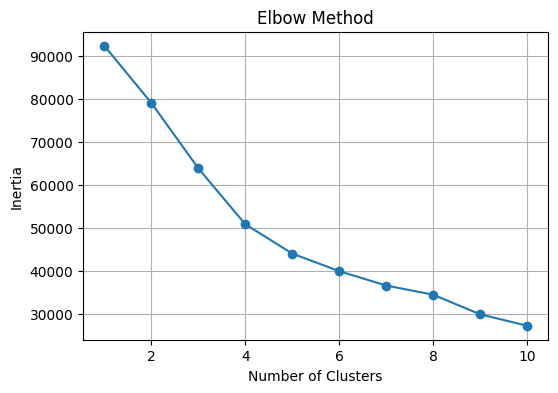

In [13]:
# Elbow Method
inertia = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [14]:
# K-Means ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
results.append(("KMeans", *evaluate_clustering(X_scaled, kmeans_labels)))

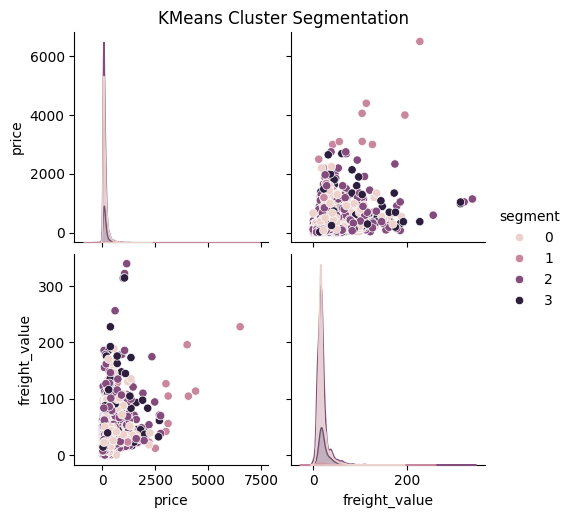

In [15]:
import seaborn as sns

# Add the KMeans cluster labels to the dataframe
data['segment'] = kmeans_labels

sns.pairplot(data, hue='segment', vars=['price', 'freight_value'])
plt.suptitle('KMeans Cluster Segmentation', y=1.02)
plt.show()

In [16]:
# Silhouette Score
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette score for k={k}: {score}")

Silhouette score for k=2: 0.7549842405268169
Silhouette score for k=3: 0.2739263389390612
Silhouette score for k=4: 0.28321163224132156
Silhouette score for k=5: 0.2885680624171001
Silhouette score for k=6: 0.27126121278275017
Silhouette score for k=7: 0.2417974017013889
Silhouette score for k=8: 0.21842958311124838
Silhouette score for k=9: 0.22859549421453362
Silhouette score for k=10: 0.23579507140281455


In [17]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
results.append(("GMM", *evaluate_clustering(X_scaled, gmm_labels)))

In [18]:
# DBSCAN ---
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
# Filter out -1 noise points for evaluation
mask = dbscan_labels != -1
if len(set(dbscan_labels[mask])) > 1:
    results.append(("DBSCAN", *evaluate_clustering(X_scaled[mask], dbscan_labels[mask])))
else:
    results.append(("DBSCAN", np.nan, np.nan, np.nan))

In [19]:
# Agglomerative Clustering ---
agglom = AgglomerativeClustering(n_clusters=4)
agglom_labels = agglom.fit_predict(X_scaled)
results.append(("Agglomerative", *evaluate_clustering(X_scaled, agglom_labels)))

In [20]:
#HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=10)
hdb_labels = hdb.fit_predict(X_scaled)
# Filter out noise for evaluation
mask = hdb_labels != -1
if len(set(hdb_labels[mask])) > 1:
    results.append(("HDBSCAN", *evaluate_clustering(X_scaled[mask], hdb_labels[mask])))
else:
   results.append(("HDBSCAN", np.nan, np.nan, np.nan))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [21]:
#Show Results ---
eval_df = pd.DataFrame(results, columns=["Model", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"])
print("\n📊 Model Evaluation Metrics:")
print(eval_df)


📊 Model Evaluation Metrics:
           Model  Silhouette  Davies-Bouldin  Calinski-Harabasz
0         KMeans    0.283212        1.130564        5043.099108
1            GMM    0.028367        3.383949        1401.138970
2         DBSCAN    0.311239        0.321871         247.834425
3  Agglomerative    0.236869        1.279504        3847.555868
4        HDBSCAN   -0.109471        0.955257         196.959860


In [ ]:
# Visualize Clustering ---
def plot_clusters(X_vis, labels, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels, palette="tab10", s=60)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

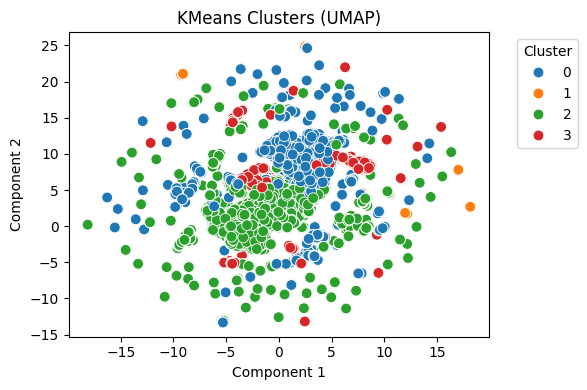

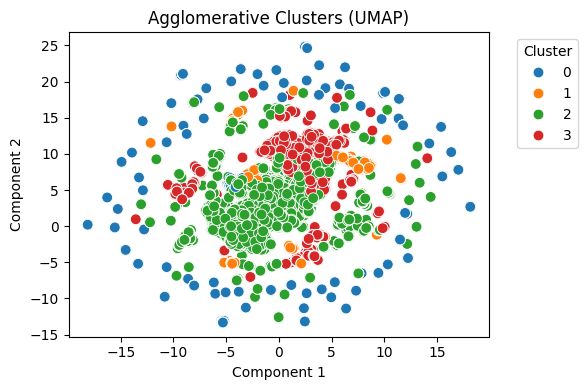

/tmp/ipython-input-22-660808405.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


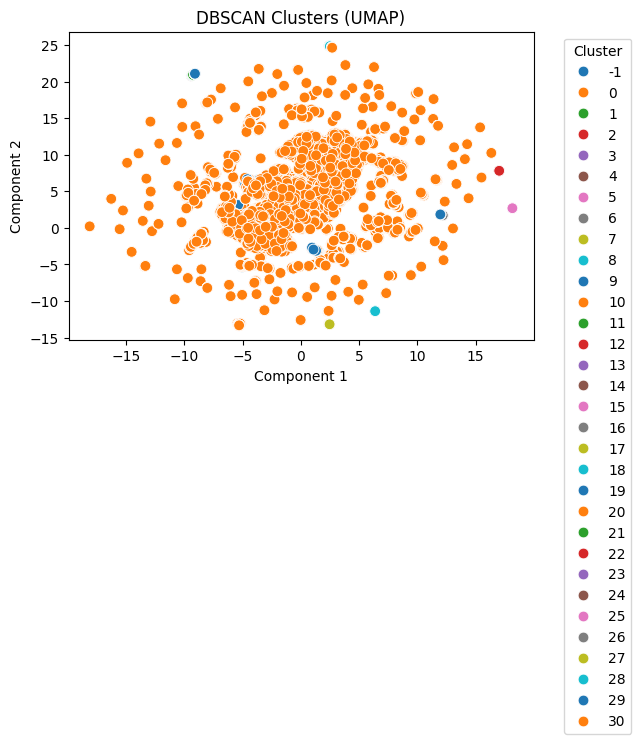

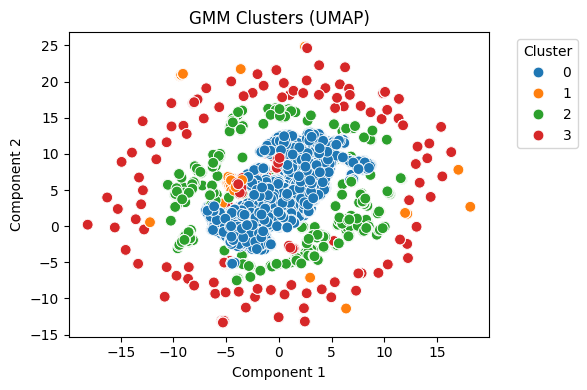

/tmp/ipython-input-22-660808405.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


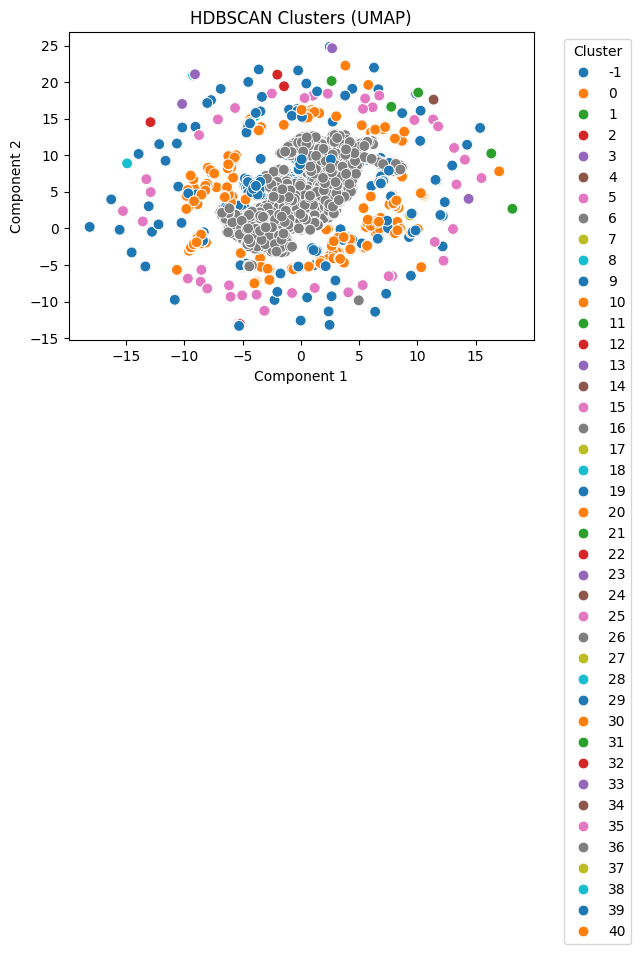

In [25]:

# Plot each
plot_clusters(X_umap, kmeans_labels, "KMeans Clusters (UMAP)")
plot_clusters(X_umap, agglom_labels, "Agglomerative Clusters (UMAP)")
plot_clusters(X_umap, dbscan_labels, "DBSCAN Clusters (UMAP)")
plot_clusters(X_umap, gmm_labels, "GMM Clusters (UMAP)")
plot_clusters(X_umap, hdb_labels, "HDBSCAN Clusters (UMAP)")

Supervised Learning to Predict Customer Segments


In [27]:
# Encode payment_type
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['payment_type_encoded'] = le.fit_transform(data['payment_type'])

In [29]:
# Define Features and Target for Supervised Learning
supervised_features = ['total_spent', 'delivery_delay', 'actual_delivery_time', 'recency_days', 'frequency', 'payment_type_encoded']
X_sup = data[supervised_features]
y_sup = data['segment']

# ✅ Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sup, y_sup, test_size=0.2, random_state=42)

In [31]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📘 Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))


📘 Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1487
           1       1.00      1.00      1.00        42
           2       0.99      0.99      0.99      1767
           3       0.98      0.98      0.98       404

    accuracy                           0.99      3700
   macro avg       0.99      0.99      0.99      3700
weighted avg       0.99      0.99      0.99      3700

Accuracy: 0.9935135135135135
F1 Score: 0.9935175790415808


In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n📘 Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))


📘 Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1487
           1       0.80      0.98      0.88        42
           2       1.00      0.98      0.99      1767
           3       0.95      0.96      0.95       404

    accuracy                           0.98      3700
   macro avg       0.93      0.98      0.95      3700
weighted avg       0.98      0.98      0.98      3700

Accuracy: 0.9829729729729729
F1 Score: 0.9831362884784929


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


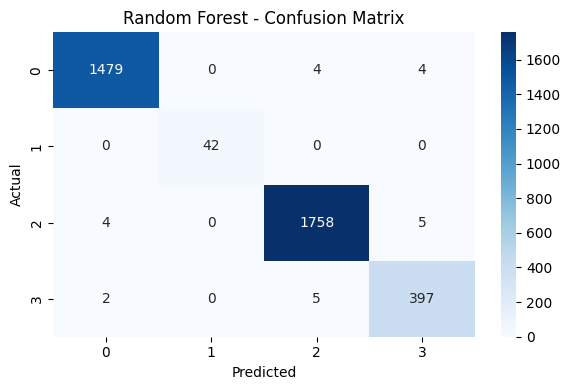

In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
#Reduce Dimensionality with UMAP for Visualization
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisati